In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 2s 0us/step


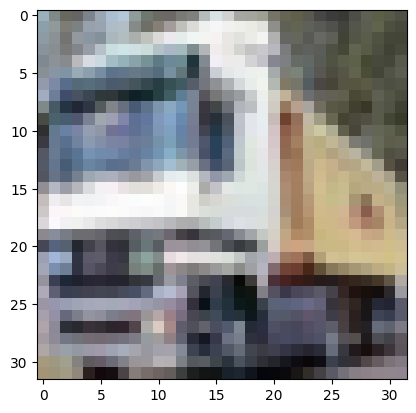

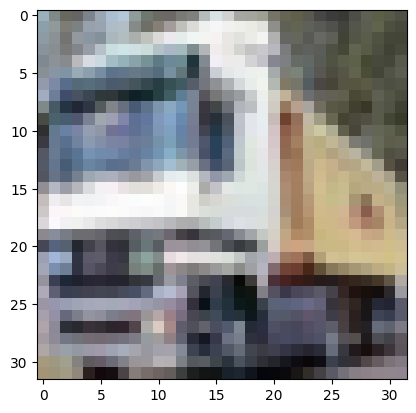

In [7]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
plt.imshow(x_train[1])
plt.show()
x_train = x_train / 255.0
x_test = x_test / 255.0
plt.imshow(x_train[1])
plt.show()

In [9]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 397802 (1.52 MB)
Trainable params: 397802 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)


test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

Epoch 1/25
1250/1250 [==============================] - 11s 8ms/step - loss: 1.9667 - accuracy: 0.2727 - val_loss: 1.9225 - val_accuracy: 0.3103
Epoch 2/25
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7915 - accuracy: 0.3476 - val_loss: 1.7784 - val_accuracy: 0.3530
Epoch 3/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7199 - accuracy: 0.3789 - val_loss: 1.7039 - val_accuracy: 0.3820
Epoch 4/25
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6719 - accuracy: 0.3956 - val_loss: 1.6589 - val_accuracy: 0.4089
Epoch 5/25
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6293 - accuracy: 0.4145 - val_loss: 1.6537 - val_accuracy: 0.4059
Epoch 6/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5980 - accuracy: 0.4236 - val_loss: 1.6397 - val_accuracy: 0.4130
Epoch 7/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5744 - accuracy: 0.4347 - val_loss: 1.6555 - val_accurac

313/313 [==============================] - 1s 2ms/step


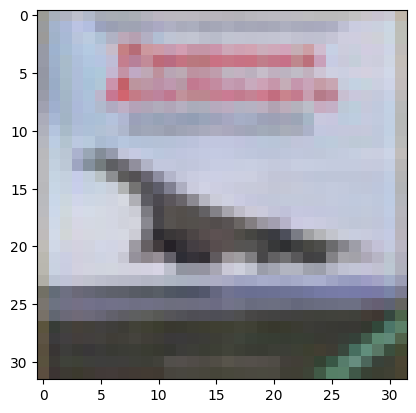

In [12]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
plt.imshow(x_test[3])
plt.show()